In [12]:
import os
import math
import random
import numpy as np
import pandas as pd
import requests
import csv
import time
from bs4 import BeautifulSoup
import unicodedata

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg #another version of opencv display image. I think it's just rendering things that have a height, width, and color dimensionality to them

from tensorflow.keras import layers
from tensorflow.keras import Model

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator #using because this is a cnn and we want it to handle images in a fast manner
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import nltk
from nltk.stem import WordNetLemmatizer

# Special
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_original = pd.read_csv('./data/phys_chem_reddit_data.csv')
df_lemma = pd.read_csv('./data/lemmatized_nostop_data.csv')
df_stem = pd.read_csv('./data/stemmed_nostop_data.csv')

In [3]:
df_lemma.head()

,subreddit,selftext,title
0,1,I planning set home PC AMD Ryzen X processor G...,Choice GPU running MD simulation NAMD GROMACS
1,1,Ok So I bit bizarre question I believe I under...,Balance Bird v Spin top
2,1,Would account spin Observations quantum mechan...,Do electron convective core
3,1,According Bekenstein bound httpsenwikipediaorg...,Is quantum computing dangerous impposible
4,1,So I understand conceptually Big Rip I cant ge...,On The Big Rip The Mighty Quark


## Baseline Model
- We need to calculate baseline accuracy in order to tell if our model is better than null model (predicting the plurality class).

In [4]:
#extract feature array
X = df_lemma['selftext']
y = df_lemma['subreddit']

In [5]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [7]:
y_train.sum()

1406

In [8]:
len(y_train)

2884

In [6]:
1- y_train.sum()/len(y_train)

0.5124826629680999

In [8]:
#count vectorizer
cvect = CountVectorizer(stop_words='english')

## Naive Bayes

In [86]:
X = df_stem['selftext']
y = df_stem['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [87]:
#naive bayes
nbayes = MultinomialNB()
#pipeline
pipe = make_pipeline(cvect, nbayes)
params = {'countvectorizer__max_features': [50, 100, 150, 200],
         'countvectorizer__min_df': [1, 2, 6, 10],
         'countvectorizer__max_df': [0.5, 0.8, .9], #at least 50%, 80%, 90%
         'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid=params)

In [88]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.5, 0.8, 0.9],
                         'countvectorizer__max_features': [50, 100, 150, 200],
                         'countvectorizer__min_df': [1, 2, 6, 10],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [89]:
#examine the best parameters
grid.best_params_

{'countvectorizer__max_df': 0.5,
 'countvectorizer__max_features': 200,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 2)}

In [90]:
preds = grid.predict(X_test)

In [91]:
print('Accuracy score: ', accuracy_score(y_test, preds))
print('Precision score: ', precision_score(y_test, preds))
print('Recall score: ', recall_score(y_test, preds))

Accuracy score:  0.8451143451143451
Precision score:  0.8703703703703703
Recall score:  0.8017057569296375


Text(91.68, 0.5, 'predicted label')

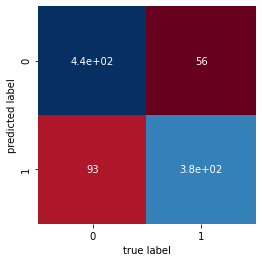

In [92]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
#xticklabels=['epistemology', 'ethics'], yticklabels=[‘epistemology’, ‘ethics’])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [9]:
#naive bayes
nbayes = MultinomialNB()

In [11]:
#pipeline
pipe = make_pipeline(cvect, nbayes)

In [12]:
params = {'countvectorizer__max_features': [50, 100, 150, 200],
         'countvectorizer__min_df': [1, 2, 6, 10],
         'countvectorizer__max_df': [0.5, 0.8, .9], #at least 50%, 80%, 90%
         'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

In [13]:
grid = GridSearchCV(pipe, param_grid=params)

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.5, 0.8, 0.9],
                         'countvectorizer__max_features': [50, 100, 150, 200],
                         'countvectorizer__min_df': [1, 2, 6, 10],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [15]:
#examine the best parameters
grid.best_params_

{'countvectorizer__max_df': 0.5,
 'countvectorizer__max_features': 200,
 'countvectorizer__min_df': 10,
 'countvectorizer__ngram_range': (1, 3)}

In [17]:
preds = grid.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [20]:
print('Accuracy score: ', accuracy_score(y_test, preds))
print('Precision score: ', precision_score(y_test, preds))
print('Recall score: ', recall_score(y_test, preds))

Accuracy score:  0.83991683991684
Precision score:  0.8758949880668258
Recall score:  0.7825159914712153


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Text(91.68, 0.5, 'predicted label')

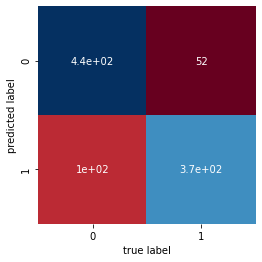

In [24]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
#xticklabels=['epistemology', 'ethics'], yticklabels=[‘epistemology’, ‘ethics’])
plt.xlabel('true label')
plt.ylabel('predicted label')

## Logistic Regression

In [96]:
#count vectorizer
cvect = CountVectorizer(stop_words='english')

In [13]:
logreg = LogisticRegression()

In [101]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = make_pipeline(cvect, logreg)

#Specifies different hyperparameter values that we want to test across
params = {'countvectorizer__max_features': [50, 100, 150, 200],
          'countvectorizer__min_df': [1, 2, 6, 10],
          'countvectorizer__max_df': [0.5, 0.8, .9], #at least 50%, 80%, 90%
          'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
          'logisticregression__penalty':['l2','l1'],
          'logisticregression__C':[0.1, 1, 10],
}

#Executes GridSearch
gs_lr1 = GridSearchCV(pipe, params, cv=4, verbose=3, n_jobs=-1)
gs_lr1.fit(X_train, y_train)

Fitting 4 folds for each of 864 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  4.2min finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.5, 0.8, 0.9],
                         'countvectorizer__max_features': [50, 100, 150, 200],
                         'countvectorizer__min_df': [1, 2, 6, 10],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)],
                         'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__penalty': ['l2', 'l1']},
             verbose=3)

In [102]:
gs_lr1.score(X_train, y_train)

0.8637309292649098

In [103]:
gs_lr1.score(X_test, y_test)

0.8575883575883576

In [ ]:
#gs_lr1.predict(X_test)

In [105]:
from sklearn.metrics import classification_report

In [150]:
def fancy_confusion_matrix(y_test, preds):
    cmat = confusion_matrix(y_test, preds)
    print(f'Accuracy: {accuracy_score(y_test, preds)}')
    print(classification_report(y_test, preds))
    return pd.DataFrame(cmat, columns=['Predicted ' + str(i) for i in ['Physics','chemistry']],\
                        index=['Actual ' + str(i) for i in ['Physics','chemistry']])

predicts = gs_lr1.predict(X_test)
fancy_confusion_matrix(y_test, predicts)

Accuracy: 0.9054054054054054
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       493
           1       0.92      0.89      0.90       469

    accuracy                           0.91       962
   macro avg       0.91      0.90      0.91       962
weighted avg       0.91      0.91      0.91       962



,Predicted Physics,Predicted chemistry
Actual Physics,455,38
Actual chemistry,53,416


Text(91.68, 0.5, 'predicted label')

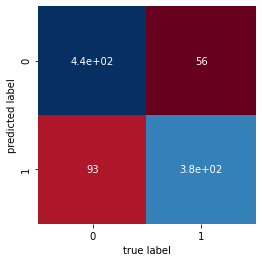

In [151]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
#xticklabels=['epistemology', 'ethics'], yticklabels=[‘epistemology’, ‘ethics’])
plt.xlabel('true label')
plt.ylabel('predicted label')

## With Tfidf

In [107]:
#count vectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [108]:
logreg = LogisticRegression()

In [112]:
#Creates pipeline to handle vectorization and logistic regression steps
pipe = make_pipeline(tfidf, logreg)

#Specifies different hyperparameter values that we want to test across
params = {'tfidfvectorizer__max_features': [2000, 3000, 4000, 5000], 
          'tfidfvectorizer__stop_words': ['english', None],
          'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)],
          'logisticregression__penalty':['l2','l1'],
          'logisticregression__C':[0.1, 1, 10],
}

#Executes GridSearch
gs_lr2 = GridSearchCV(pipe, params, cv=4, verbose=3, n_jobs=-1)
gs_lr2.fit(X_train, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   20.2s finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'tfidfvectorizer__max_features': [2000, 3000, 4000,
                                                           5000],
                         'tfidfvectorizer__ngram_range': [(1, 2), (1, 1)],
                         'tfidfvectorizer__stop_words': ['english', None]},
             verbose=3)

In [116]:
gs_lr2.best_params_

{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'tfidfvectorizer__max_features': 4000,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__stop_words': None}

In [113]:
# Score model on training set.
gs_lr2.score(X_train, y_train)

0.9604715672676838

In [114]:

# Score model on testing set.
gs_lr2.score(X_test, y_test)

0.9054054054054054

In [152]:
predicts = gs_lr2.predict(X_test)
fancy_confusion_matrix(y_test, predicts)

Accuracy: 0.9054054054054054
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       493
           1       0.92      0.89      0.90       469

    accuracy                           0.91       962
   macro avg       0.91      0.90      0.91       962
weighted avg       0.91      0.91      0.91       962



,Predicted Physics,Predicted chemistry
Actual Physics,455,38
Actual chemistry,53,416


Text(91.68, 0.5, 'predicted label')

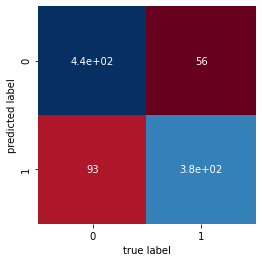

In [153]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
#xticklabels=['epistemology', 'ethics'], yticklabels=[‘epistemology’, ‘ethics’])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [118]:
coefs = pd.DataFrame(gs_lr2.best_estimator_.steps[1][1].coef_).T
coefs.columns = ['coef']
coefs['ngram'] = gs_lr2.best_estimator_.steps[0][1].get_feature_names()
coefs = coefs[['ngram','coef']]
coefs = coefs.sort_values('coef')
#coefs.to_csv('./csvs/coef_ranks.csv',index=False)
coefs.head(10)

,ngram,coef
603,chemistri,-6.834085
601,chemic,-3.450784
36,acid,-2.842138
2010,lab,-2.800149
2913,reaction,-2.649828
599,chem,-2.622460
602,chemist,-2.275908
2513,organ,-2.254280
3865,water,-2.150410
2311,molecul,-2.099812


In [120]:
!pip install wordcloud

     |████████████████████████████████| 162 kB 2.1 MB/s eta 0:00:01


In [155]:
from wordcloud import WordCloud

ChemistryWordCloud = coefs[0:200]
PhysicsWordCloud = coefs.sort_values('coef',ascending=False)[0:200]
PhysicsWordCloud[:10]

,ngram,coef
2651,physic,7.311782
1411,forc,2.812227
2865,quantum,2.324193
2090,light,2.304542
2652,physicist,2.070253
3758,univers,2.014284
3582,theori,1.970260
3869,wave,1.836353
3633,time,1.811903
2160,magnet,1.735726


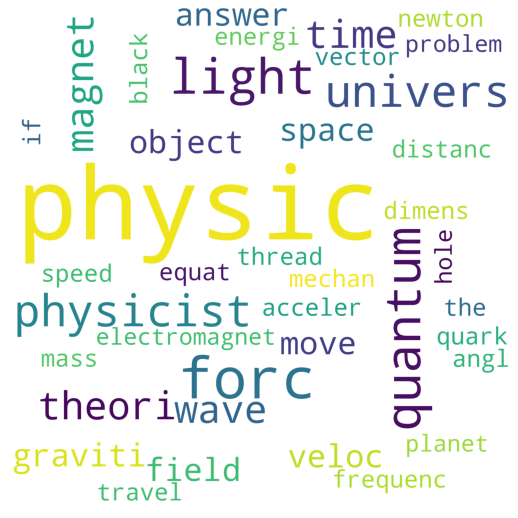

In [126]:
#How to create a wordcloud:
d={}
for key, val in PhysicsWordCloud.values:
    d[key] = int(val**2)

wordcloud = WordCloud(width = 2000, height = 2000,
                      background_color ='white',
                      min_font_size = 10).generate_from_frequencies(d)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

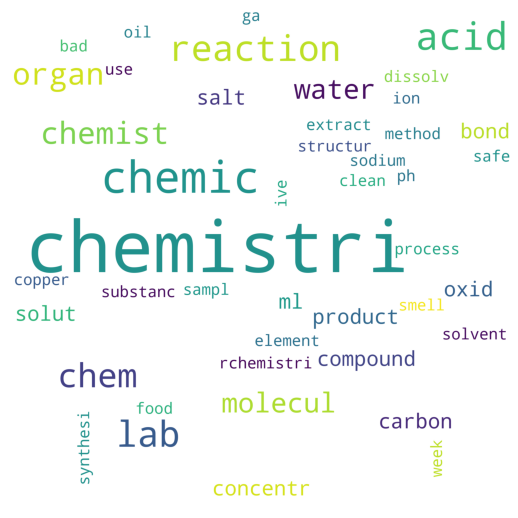

In [125]:
#How to create a wordcloud:
d={}
for key, val in ChemistryWordCloud.values:
    d[key] = int(val**2)

wordcloud = WordCloud(width = 2000, height = 2000,
                      background_color ='white',
                      min_font_size = 10).generate_from_frequencies(d)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [128]:
df_stem.head()

,subreddit,selftext,title
0,1,I plan set home PC amd ryzen X processor GB ra...,choic gpu run MD simul namd gromac
1,1,Ok So I bit bizarr question I believ I underst...,balanc bird v spin top
2,1,would account spin observ quantum mechan gener...,Do electron convect core
3,1,accord bekenstein bound httpsenwikipediaorgwik...,Is quantum comput danger imppos
4,1,So I understand conceptu big rip I cant get he...,On the big rip the mighti quark


In [146]:
predictions = pd.DataFrame(gs_lr2.predict_proba(X))
predictions['text'] = df_stem['selftext']

preds_sort = predictions.sort_values(1)[0:25]
predictions['text'][0]

'I plan set home PC amd ryzen X processor GB ram GB ssd I abl decid appropri gpu among geforc gtx geforc gtx ormsi Ti Ti given budget limit lakh rupe I prefer go first option I wish know differ second option make compar first one In principl I want know x gpu ie nvidia flagship card poss special advantag rest come MD simul use cuda'

In [148]:
preds_sort['text'][0]

KeyError: 0

In [135]:
#Shows the top chemistry predicted comments
predictions.sort_values(1)[0:25]['text']

2053    In organ chemistri function group specif subst...
2329    hello I know much chemistri hope find help I h...
2969    Hi everyon for background I work larg chemic p...
2870    Hi everyon I wa hope might abl help even bit I...
2387    fischer esterif straightforward make ester sma...
2269    hello guy I need help chemistri homework I rea...
2772    hey love chemist I teach altern process photog...
2620    home chemistri hobbi synthes sort chemic limit...
3436    Hi everybodi ive long fascin chemistri dabbl a...
3595    Hi Im weigh potenti msc option I came across c...
2052    which branch chemistri ha better job prospect ...
2526    you spill acid chemistri lab set better rins c...
3026    I attempt mix solut wood finish I chemic compo...
3047    I year left graduat highschool want obtain deg...
3842    I start th grade freshman year high school I l...
3654    Hi I help fellow peer understand follow equat ...
2768    I cant take chemistri next year I wa wonder co...
3018    hello 

# Spacy

In [26]:
import spacy

In [27]:
nlp = spacy.load("en_core_web_sm")

In [28]:
doc = nlp('This is a sentence about natural language processing at Google in New York.')
doc

This is a sentence about natural language processing at Google in New York.

In [29]:
from textblob import TextBlob

In [31]:
blob = TextBlob('This is a sentence about natural language processing at Google in New York.')
blob.ngrams()

[WordList(['This', 'is', 'a']),
 WordList(['is', 'a', 'sentence']),
 WordList(['a', 'sentence', 'about']),
 WordList(['sentence', 'about', 'natural']),
 WordList(['about', 'natural', 'language']),
 WordList(['natural', 'language', 'processing']),
 WordList(['language', 'processing', 'at']),
 WordList(['processing', 'at', 'Google']),
 WordList(['at', 'Google', 'in']),
 WordList(['Google', 'in', 'New']),
 WordList(['in', 'New', 'York'])]

In [32]:
for word in doc:
    print(word.text, word.pos_, word.lemma_)

This DET this
is AUX be
a DET a
sentence NOUN sentence
about ADP about
natural ADJ natural
language NOUN language
processing NOUN processing
at ADP at
Google PROPN Google
in ADP in
New PROPN New
York PROPN York
. PUNCT .


In [33]:
from spacy import displacy

displacy.render(doc, style = 'dep', jupyter = True)

In [34]:
displacy.render(doc, style = 'ent', jupyter = True)

In [35]:
df_lemma.head(10)

,subreddit,selftext,title
0,1,I planning set home PC AMD Ryzen X processor G...,Choice GPU running MD simulation NAMD GROMACS
1,1,Ok So I bit bizarre question I believe I under...,Balance Bird v Spin top
2,1,Would account spin Observations quantum mechan...,Do electron convective core
3,1,According Bekenstein bound httpsenwikipediaorg...,Is quantum computing dangerous impposible
4,1,So I understand conceptually Big Rip I cant ge...,On The Big Rip The Mighty Quark
5,1,The assignment due tomorrow,Need someone physic lab introduction Course wi...
6,1,Imagine unbreakable megaphone attached ground ...,What megaphone placed ring
7,1,As guy probably know If put white black paper ...,What attracts heat
8,1,I currently writing book ha space travel I abl...,What exactly would happen get sucked black hole
9,1,This first time posting let know want edit del...,What decay rate uranium


In [66]:
sents = df_lemma['selftext'].values
len(sents)

3846

In [67]:
sent = nlp(sents[0])

In [68]:
sent.has_vector

True

In [71]:
sent.vector

array([ 1.0665587 ,  0.71488494,  0.16164641, -0.27638206,  1.3487163 ,
        0.26941398, -0.11188816,  0.97212774, -0.8724062 ,  2.0650117 ,
       -0.61244804, -0.43139505,  0.18819974, -0.24886793,  0.6149606 ,
       -0.58708906,  0.79372704,  0.08872136, -0.99478054,  0.88327974,
        0.05318466,  0.3807623 ,  0.48944652, -0.75950545, -0.18907736,
        0.50781727, -1.7734096 , -1.6443388 , -0.5177355 , -1.1527327 ,
       -0.9724889 , -0.35056233,  0.68359226, -1.1440674 , -0.08935878,
        0.44048724,  0.30532405, -0.27775937,  0.24829619, -0.7613824 ,
        1.4969307 , -0.07438925,  0.43834022, -0.23329195,  1.522064  ,
       -0.47447747,  0.8767986 ,  1.5961351 , -0.5421542 , -0.11090312,
       -1.2470528 , -0.45684293, -0.64660895, -0.8547317 , -0.7623281 ,
        1.8787704 ,  1.0518357 , -0.6286156 , -0.794396  ,  0.9185268 ,
        0.24995539, -0.8945339 ,  0.28255647, -1.1512387 ,  0.08039462,
        2.2231512 ,  1.3473575 ,  0.07592773,  0.777709  ,  0.35

In [72]:
sent.vector.shape

(96,)

In [73]:
data_list = [nlp(doc).vector.reshape(1, -1) for doc in sents]

In [74]:
data = np.concatenate(data_list)


In [75]:
type(data)

numpy.ndarray

In [76]:
df_lemma.head()

,subreddit,selftext,title,class
0,1,I planning set home PC AMD Ryzen X processor G...,Choice GPU running MD simulation NAMD GROMACS,physics
1,1,Ok So I bit bizarre question I believe I under...,Balance Bird v Spin top,physics
2,1,Would account spin Observations quantum mechan...,Do electron convective core,physics
3,1,According Bekenstein bound httpsenwikipediaorg...,Is quantum computing dangerous impposible,physics
4,1,So I understand conceptually Big Rip I cant ge...,On The Big Rip The Mighty Quark,physics


In [77]:
df_lemma['class'] = df_lemma['subreddit'].map({1: 'physics', 0: 'chemistry'})

In [78]:
y = df_lemma['class']

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
clf = LogisticRegression()

In [81]:
data.shape

(3846, 96)

In [82]:
y.shape

(3846,)

In [83]:
clf.fit(data, y)

LogisticRegression()

In [84]:
clf.score(data, y)

0.7108684347373895